This script searches for genes that satisfy these four rules: 
- The MUT is different at t = 72 compared to t = 0.  
- The MUT is different at t = 72 compared to WT.
- The MUT is the same as WT at t = 0.
- The WT is flat.

In [1]:
import pandas, numpy, termcolor

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':30, 'ytick.labelsize':30, 'figure.figsize':(16, 9), 'axes.labelsize':40})

# 0. user-defined variables

In [3]:
DEG_folder = '/home/adrian/projects/reynisfjara/results/DEGs_DESeq2/strict/'
expression_file = '/home/adrian/projects/reynisfjara/results/tpm/DESeq2_TPM_values.tsv'
annotation_file = '/home/adrian/projects/reynisfjara/results/annotation/annotation.csv'

mice = ['a3922', 'a4774', 'a4775', 'a4776']
times = ['0h', '48h', '72h']

# 1. read data

## 1.1. read expression

In [4]:
expression = pandas.read_csv(expression_file, sep='\t', index_col=0)
expression.head()

,a3922_0h_1,a3922_0h_2,a3922_0h_3,a3922_48h_1,a3922_48h_2,a3922_48h_3,a3922_72h_1,a3922_72h_2,a3922_72h_3,a4774_0h_1,...,a4775_72h_3,a4776_0h_1,a4776_0h_2,a4776_0h_3,a4776_48h_1,a4776_48h_2,a4776_48h_3,a4776_72h_1,a4776_72h_2,a4776_72h_3
ENSMUSG00000000001,65.244411,65.953285,64.396929,75.289955,71.147817,72.146832,67.786762,70.217188,70.219265,61.227221,...,68.440778,64.806231,65.619286,66.749396,64.425407,68.665136,68.419059,69.705546,70.717428,71.017699
ENSMUSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000028,5.945436,5.464240,4.924612,20.245428,19.780706,22.747363,19.239938,22.062649,20.547492,7.843197,...,14.565935,4.712688,3.690099,4.120889,7.220914,8.377850,9.611563,9.465468,10.235803,9.808747
ENSMUSG00000000037,0.220972,0.959207,0.258270,0.969948,1.149452,2.212842,0.989879,2.354492,1.813624,0.545637,...,0.989086,0.451844,0.523639,0.679725,2.862086,0.865126,1.973570,1.612622,2.148935,5.445061
ENSMUSG00000000049,0.061451,0.061879,0.096945,0.000000,0.071373,0.000000,0.059768,0.000000,0.000000,0.214027,...,0.761343,0.000000,0.125876,0.000000,0.000000,0.096454,0.130578,0.000000,0.000000,0.000000


## 1.2. read annotation

In [5]:
annotation = pandas.read_csv(annotation_file, sep=',', index_col='ens_gene')
annotation.drop(columns=['Unnamed: 0', 'target_id'], inplace=True)
annotation.drop_duplicates(inplace=True)
print(annotation.shape)
annotation.head()

(53193, 3)


,gene_biotype,description,ext_gene
ens_gene,,,
ENSMUSG00000064336,Mt_tRNA,mitochondrially encoded tRNA phenylalanine [So...,mt-Tf
ENSMUSG00000064337,Mt_rRNA,mitochondrially encoded 12S rRNA [Source:MGI S...,mt-Rnr1
ENSMUSG00000064338,Mt_tRNA,mitochondrially encoded tRNA valine [Source:MG...,mt-Tv
ENSMUSG00000064339,Mt_rRNA,mitochondrially encoded 16S rRNA [Source:MGI S...,mt-Rnr2
ENSMUSG00000064340,Mt_tRNA,mitochondrially encoded tRNA leucine 1 [Source...,mt-Tl1


# 2. transform expression to be more amenable for downstream analysis

It should be a matrix of WT and MUT at each timepoint, six columns in total.

In [6]:
df = pandas.DataFrame()
for mouse in mice:
    for time in times:
        condition_labels = [label for label in expression.columns if mouse in label and time in label]
        df[mouse + '_' + time] = expression.loc[:, condition_labels].median(axis=1)
df.head()

,a3922_0h,a3922_48h,a3922_72h,a4774_0h,a4774_48h,a4774_72h,a4775_0h,a4775_48h,a4775_72h,a4776_0h,a4776_48h,a4776_72h
ENSMUSG00000000001,65.244411,72.146832,70.217188,61.227221,65.197716,64.804086,55.869249,65.371837,68.440778,65.619286,68.419059,70.717428
ENSMUSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000028,5.464240,20.245428,20.547492,7.843197,8.262456,11.467644,8.258439,15.989181,16.179836,4.120889,8.377850,9.808747
ENSMUSG00000000037,0.258270,1.149452,1.813624,0.567393,1.344796,1.122762,0.472029,0.958435,1.713961,0.523639,1.973570,2.148935
ENSMUSG00000000049,0.061879,0.000000,0.000000,0.214027,0.000000,0.000000,0.149524,0.000000,0.441745,0.000000,0.096454,0.000000


In [7]:
for label in df.columns:
    if 'a3922' in label:
        new_label = 'WT_' + label.split('_')[1]
        df.rename(columns = {label:new_label}, inplace=True)
df.head()

,WT_0h,WT_48h,WT_72h,a4774_0h,a4774_48h,a4774_72h,a4775_0h,a4775_48h,a4775_72h,a4776_0h,a4776_48h,a4776_72h
ENSMUSG00000000001,65.244411,72.146832,70.217188,61.227221,65.197716,64.804086,55.869249,65.371837,68.440778,65.619286,68.419059,70.717428
ENSMUSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000028,5.464240,20.245428,20.547492,7.843197,8.262456,11.467644,8.258439,15.989181,16.179836,4.120889,8.377850,9.808747
ENSMUSG00000000037,0.258270,1.149452,1.813624,0.567393,1.344796,1.122762,0.472029,0.958435,1.713961,0.523639,1.973570,2.148935
ENSMUSG00000000049,0.061879,0.000000,0.000000,0.214027,0.000000,0.000000,0.149524,0.000000,0.441745,0.000000,0.096454,0.000000


In [8]:
simple_expression = df.iloc[:, :3]
simple_expression.head()

,WT_0h,WT_48h,WT_72h
ENSMUSG00000000001,65.244411,72.146832,70.217188
ENSMUSG00000000003,0.000000,0.000000,0.000000
ENSMUSG00000000028,5.464240,20.245428,20.547492
ENSMUSG00000000037,0.258270,1.149452,1.813624
ENSMUSG00000000049,0.061879,0.000000,0.000000


In [9]:
simple_expression = df.iloc[:, :3]

for time in times:
    condition_labels = [label for label in df.columns if time in label and 'WT' not in label]
    simple_expression['MUT_' + time] = df.loc[:, condition_labels].median(axis=1)

simple_expression.head()

,WT_0h,WT_48h,WT_72h,MUT_0h,MUT_48h,MUT_72h
ENSMUSG00000000001,65.244411,72.146832,70.217188,61.227221,65.371837,68.440778
ENSMUSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000028,5.464240,20.245428,20.547492,7.843197,8.377850,11.467644
ENSMUSG00000000037,0.258270,1.149452,1.813624,0.523639,1.344796,1.713961
ENSMUSG00000000049,0.061879,0.000000,0.000000,0.149524,0.000000,0.000000


# 3. Retrieve pattern at the significance level

## 3.1. Retrieve genes that change with time in MUT phenotype.

In [10]:
DEGs = []
for mouse in mice[1:]:
    path = DEG_folder + 'strict_MUTt72_over_MUTt0_' + mouse + '.tsv'
    df = pandas.read_csv(path, sep='\t', index_col=0)
    print(df.shape)
    DEGs.append(df.index.to_list())
list_one = list(set(DEGs[0]) & set(DEGs[1]) & set(DEGs[2]))
print(len(list_one))

(468, 6)
(1049, 6)
(1056, 6)
218


## 3.2. retrieve genes that are different WT vs MUT at t = 72

In [11]:
DEGs = []
for mouse in mice[1:]:
    path = DEG_folder + 'strict_MUTt72_over_WTt72_' + mouse + '.tsv'
    df = pandas.read_csv(path, sep='\t', index_col=0)
    print(df.shape)
    DEGs.append(df.index.to_list())
list_two = list(set(DEGs[0]) & set(DEGs[1]) & set(DEGs[2]))
print(len(list_two))

(1688, 6)
(997, 6)
(2071, 6)
509


In [12]:
list_twoa = list(set(list_one) & set(list_two))
print(len(list_twoa))

35


## 3.3. retrieve genes that WT and MUT are the same at t = 0

In [13]:
DEGs = []
for mouse in mice[1:]:
    path = DEG_folder + 'strict_MUTt0_over_WTt0_' + mouse + '.tsv'
    df = pandas.read_csv(path, sep='\t', index_col=0)
    print(df.shape)
    DEGs.append(df.index.to_list())
list_three = list(set(DEGs[0]) & set(DEGs[1]) & set(DEGs[2]))
print(len(list_three))

(1260, 6)
(943, 6)
(1362, 6)
368


In [14]:
list_threea = [element for element in list_twoa if element not in list_three]
print(len(list_threea))

25


## 3.4. check that genes are WT flat

In [15]:
DEGs = []
for mouse in mice[1:]:
    path = DEG_folder + 'strict_WTt72_over_WTt0' + '.tsv'
    df = pandas.read_csv(path, sep='\t', index_col=0)
    print(df.shape)
    DEGs.append(df.index.to_list())
list_four = list(set(DEGs[0]) & set(DEGs[1]) & set(DEGs[2]))
print(len(list_four))

(1383, 6)
(1383, 6)
(1383, 6)
1383


In [16]:
list_foura = [element for element in list_threea if element not in list_four]
print(len(list_foura))

20


ENSMUSG00000013653	1810065E05Rik	down	RIKEN cDNA 1810065E05 gene
ENSMUSG00000020121	Srgap1	down	SLIT-ROBO Rho GTPase activating protein 1
ENSMUSG00000068220	Lgals1	down	lectin, galactose binding, soluble 1
ENSMUSG00000017817	Jph2	up	junctophilin 2
ENSMUSG00000074892	B3galt5	down	UDP-Gal:betaGlcNAc beta 1,3-galactosyltransferase, polypeptide 5
ENSMUSG00000024846	Cst6	down	cystatin E/M
ENSMUSG00000063564	Col23a1	up	collagen, type XXIII, alpha 1
ENSMUSG00000052468	Pmp2	up	peripheral myelin protein 2
ENSMUSG00000033597	Caskin1	up	CASK interacting protein 1
ENSMUSG00000067219	Nipal1	down	NIPA-like domain containing 1
ENSMUSG00000006931	P3h4	up	prolyl 3-hydroxylase family member 4 (non-enzymatic)
ENSMUSG00000032558	Nphp3	up	nephronophthisis 3 (adolescent)
ENSMUSG00000033453	Adamts15	up	a disintegrin-like and metallopeptidase (reprolysin type) with thrombospondin type 1 motif, 15
ENSMUSG00000025854	Fam20c	down	FAM20C, golgi associated secretory pathway kinase
ENSMUSG00000009687	Fxyd5	down	FXY

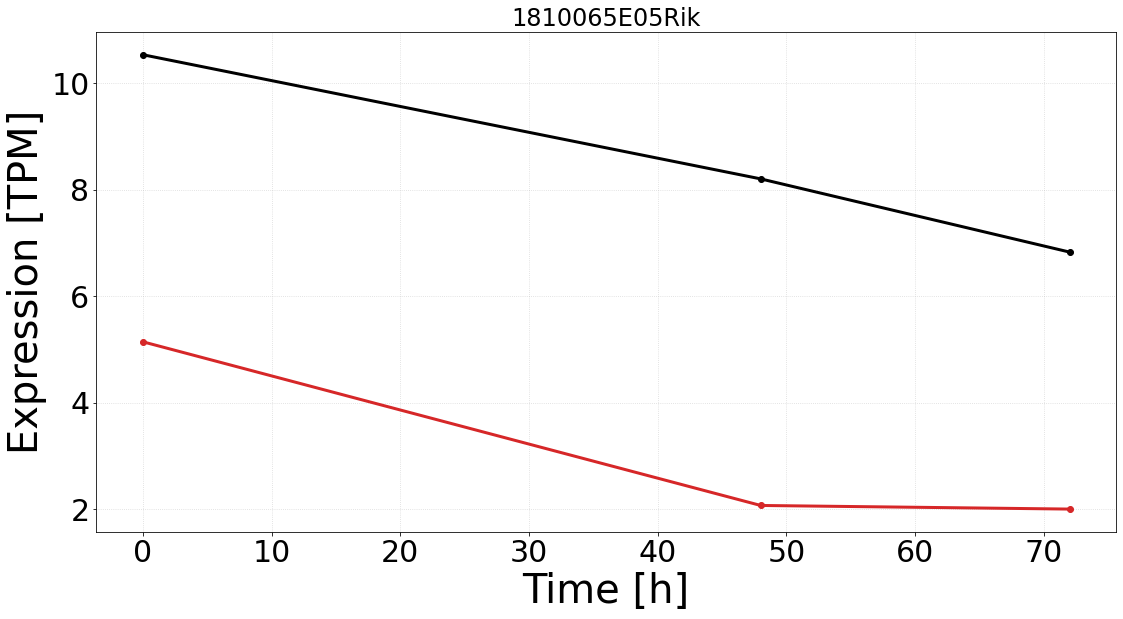

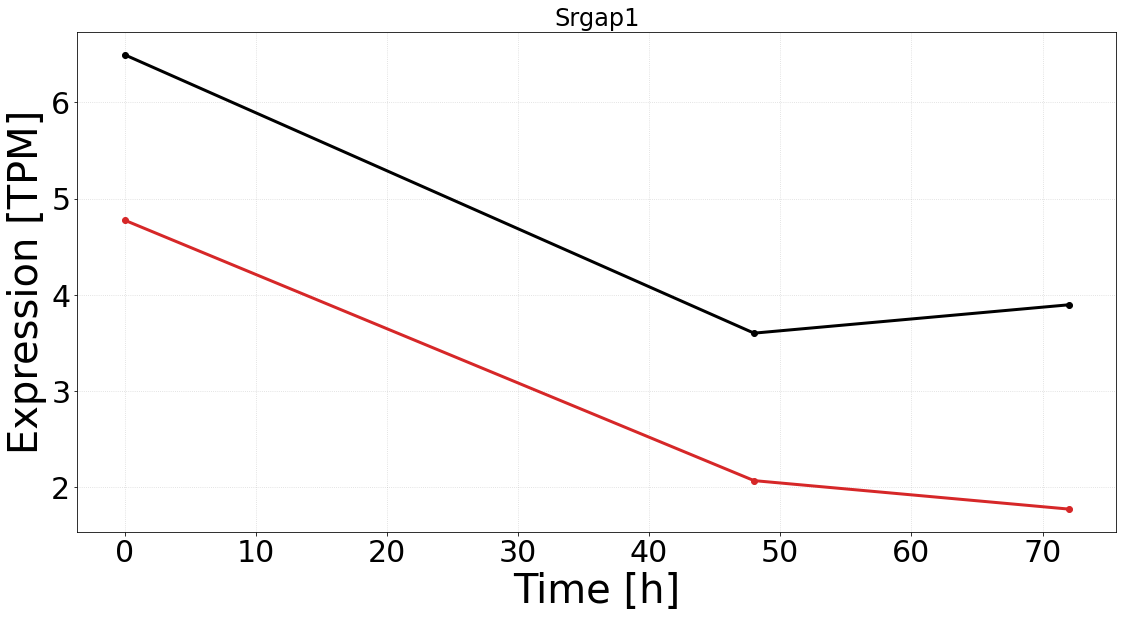

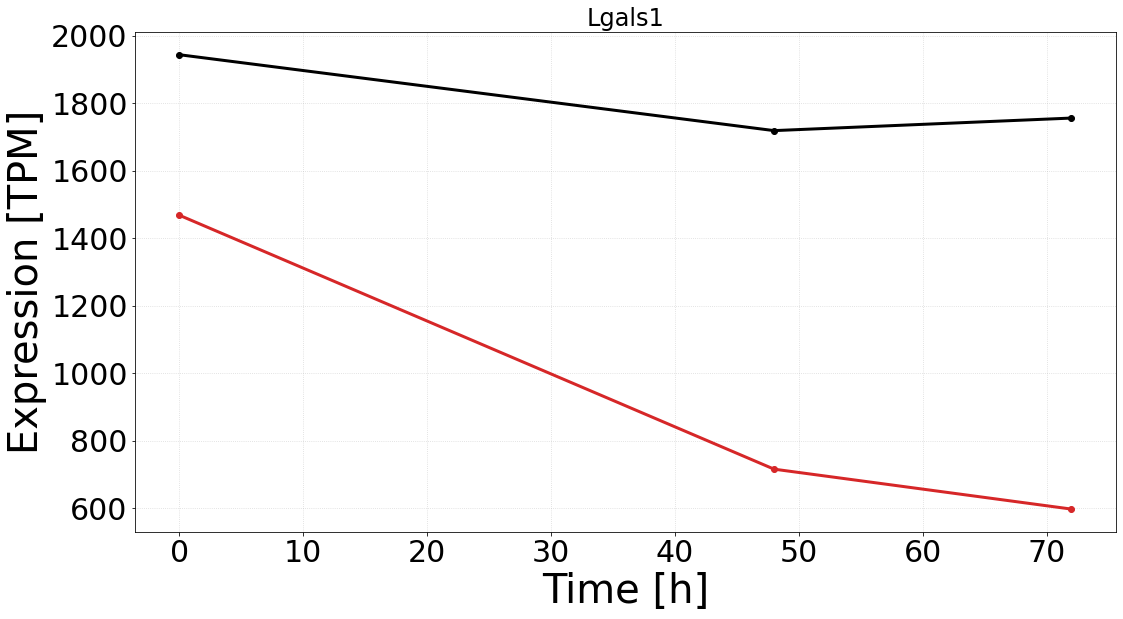

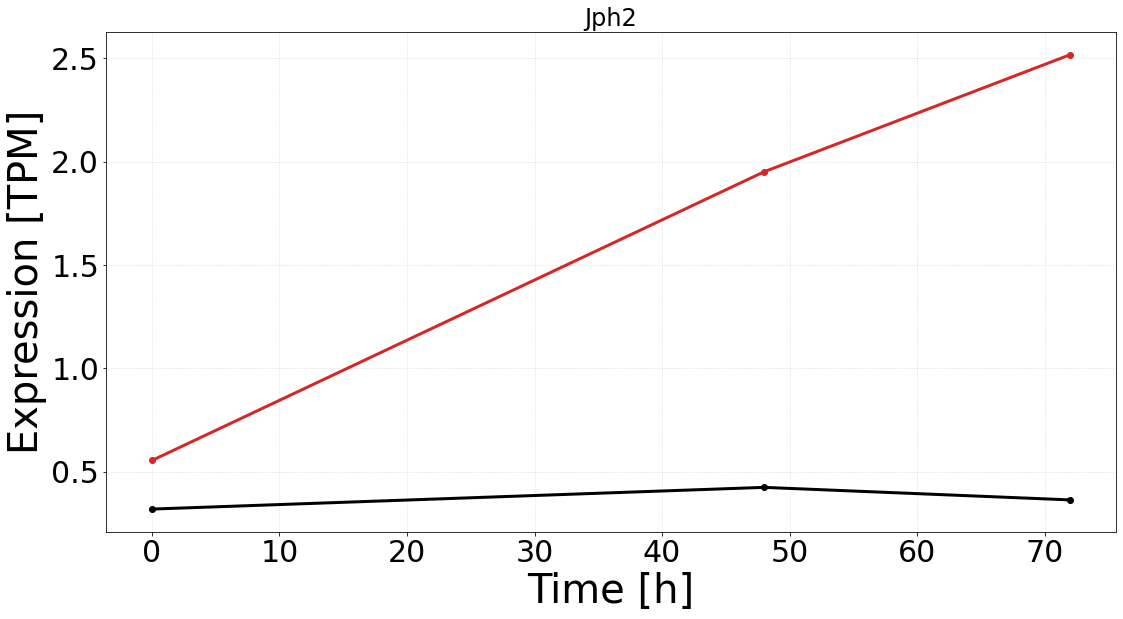

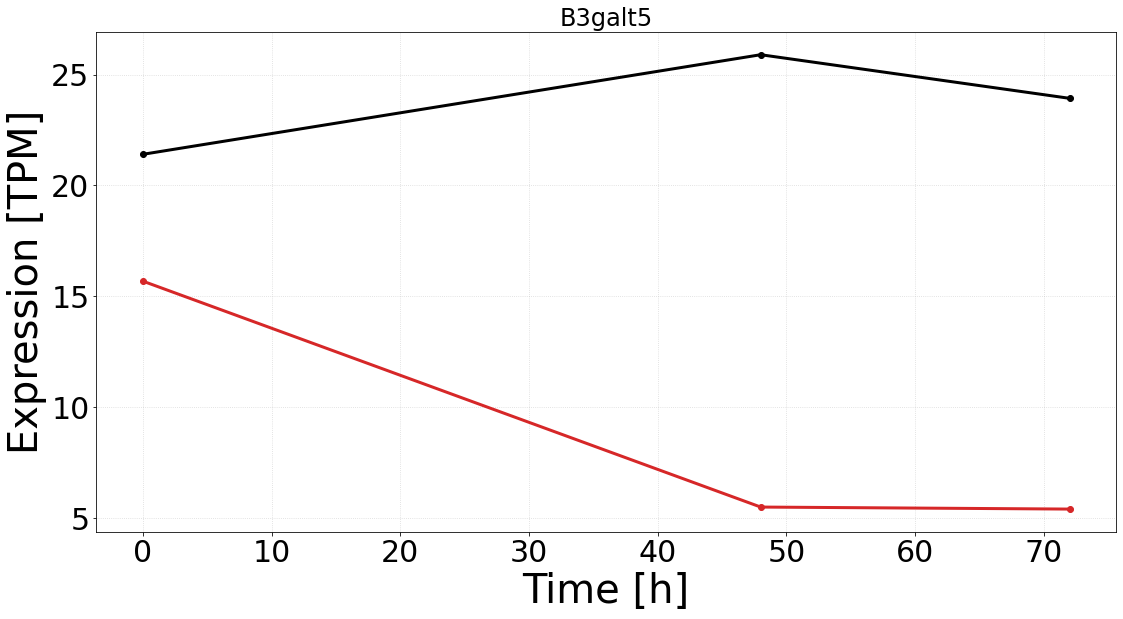

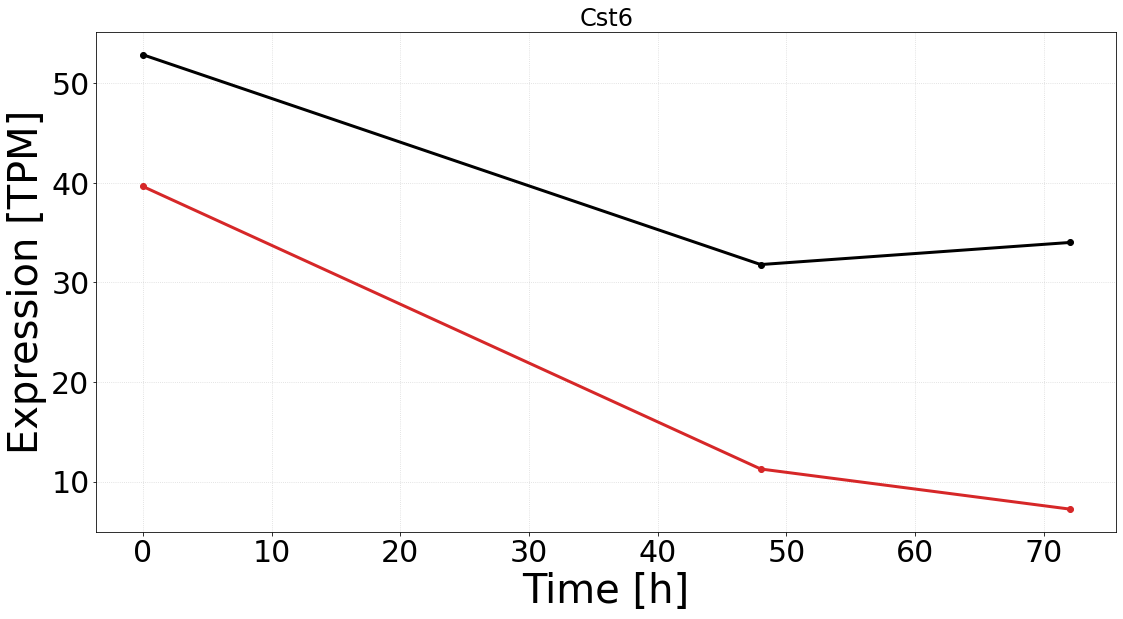

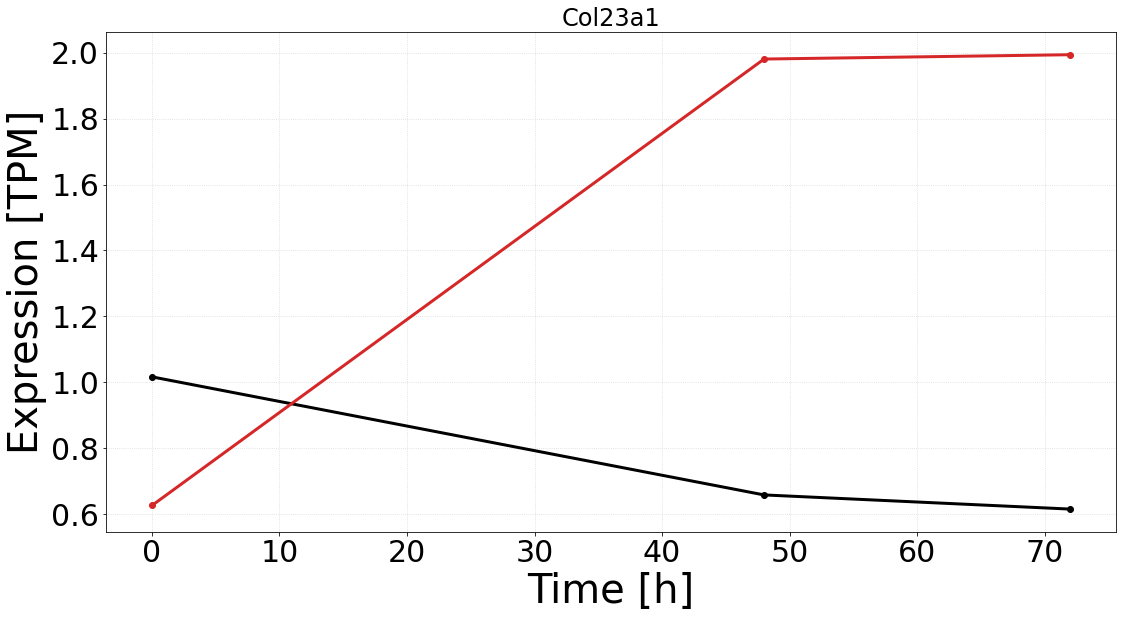

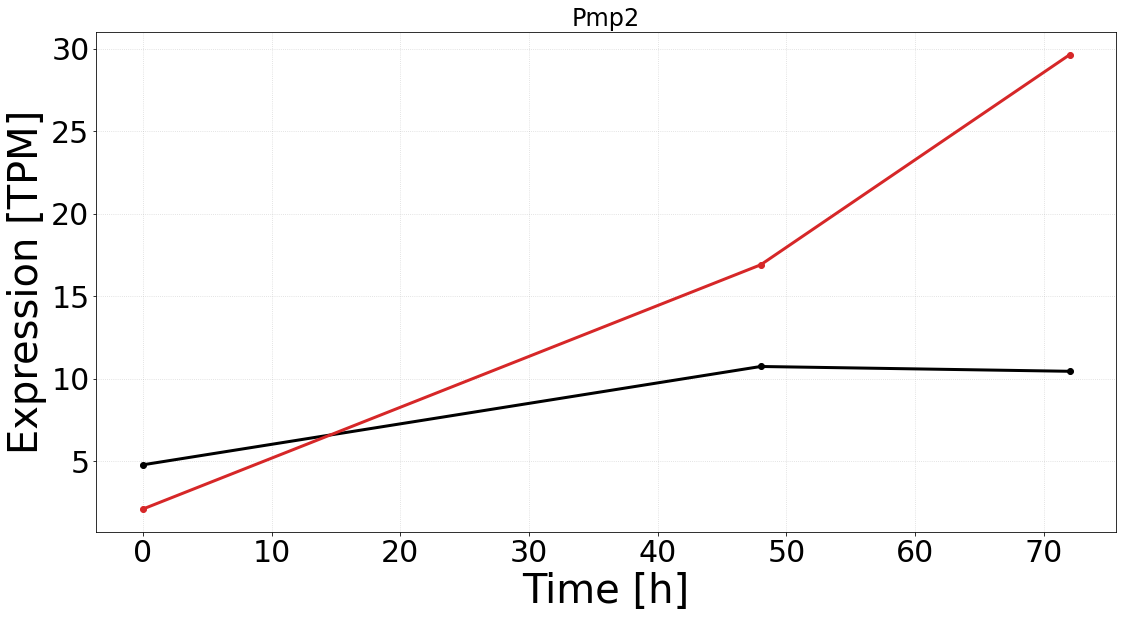

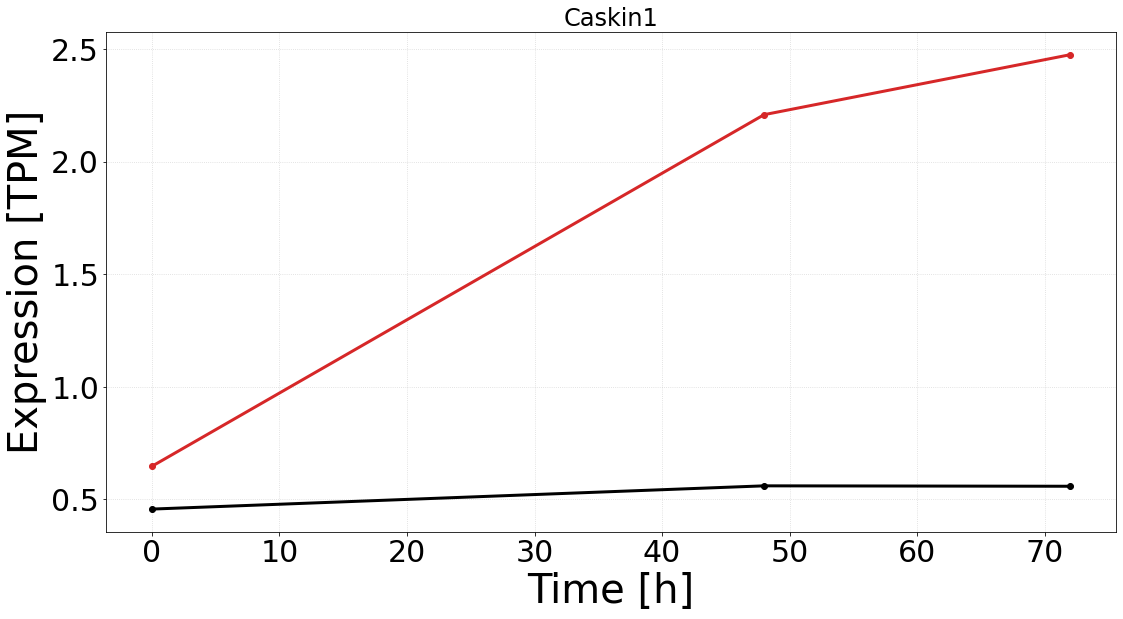

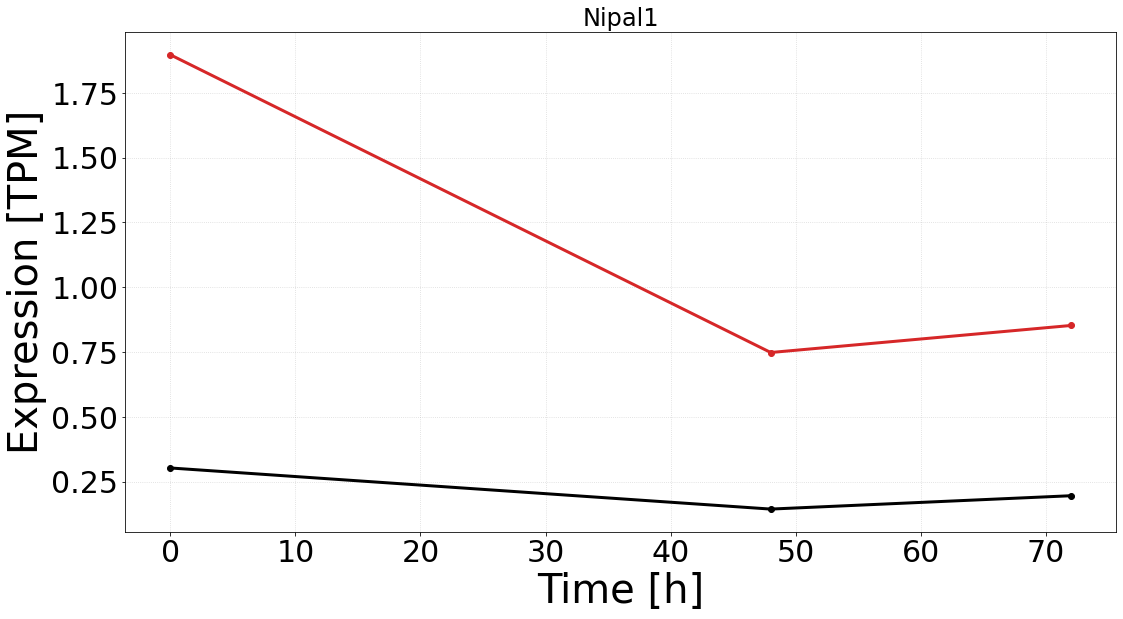

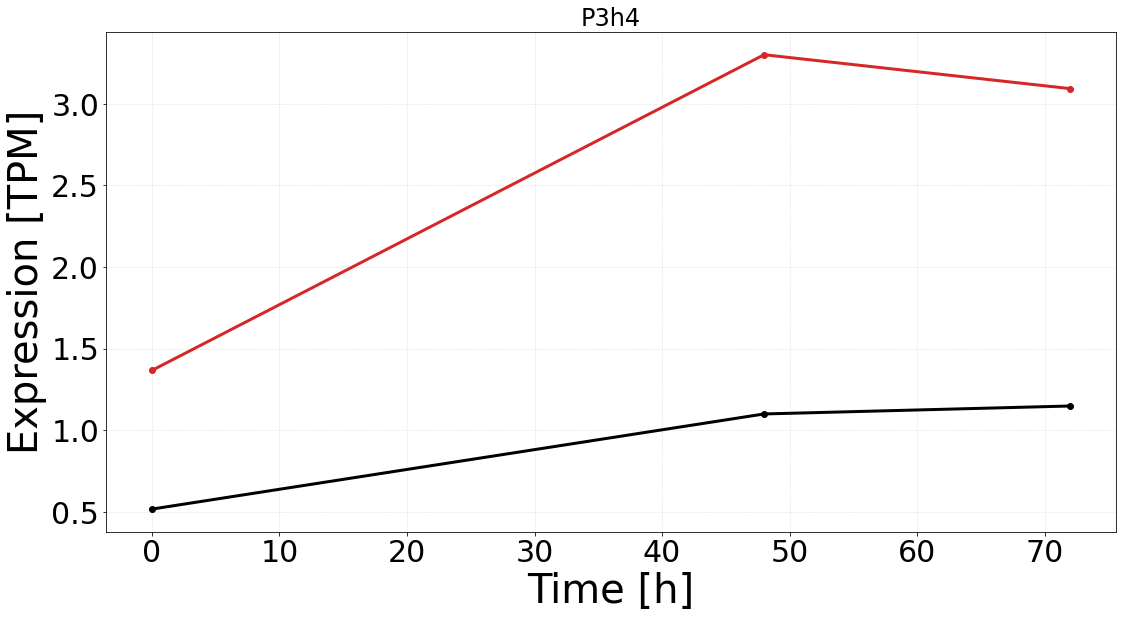

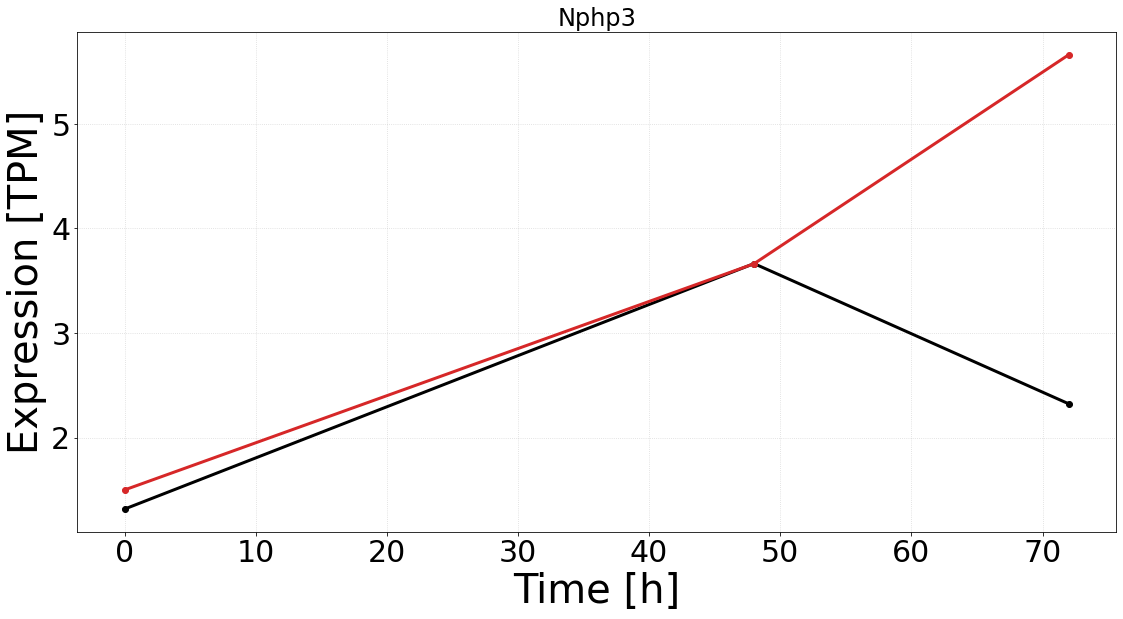

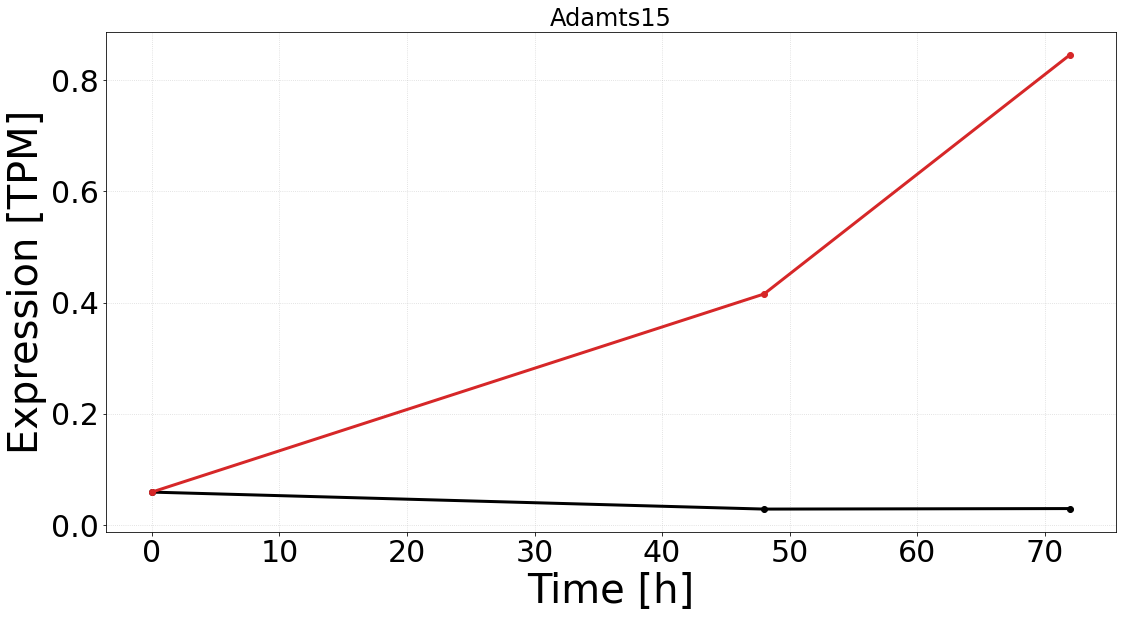

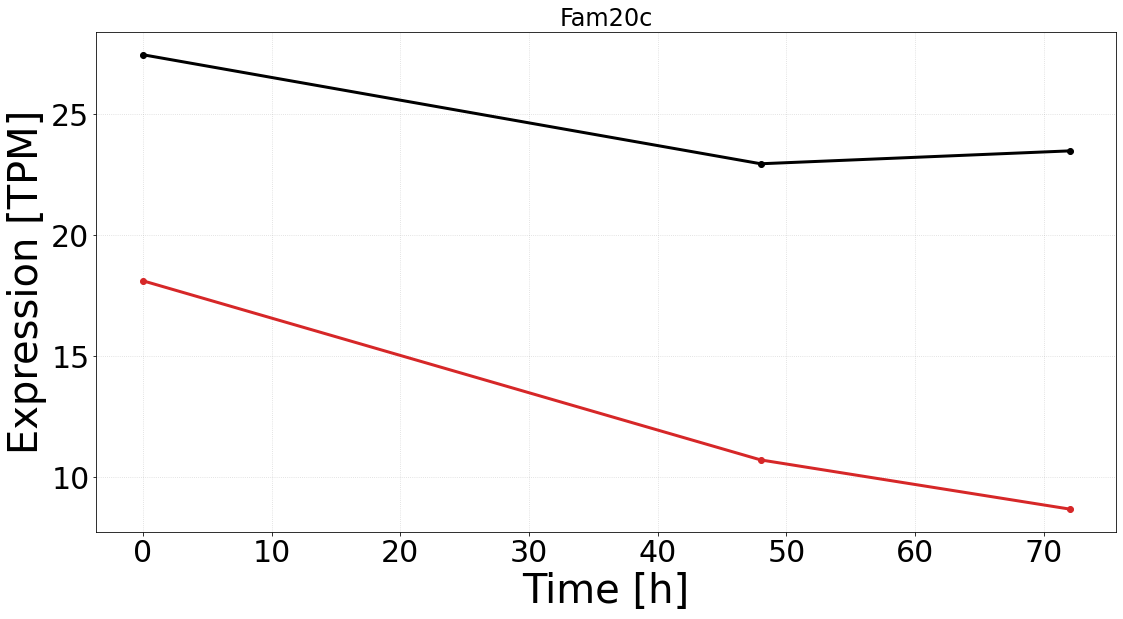

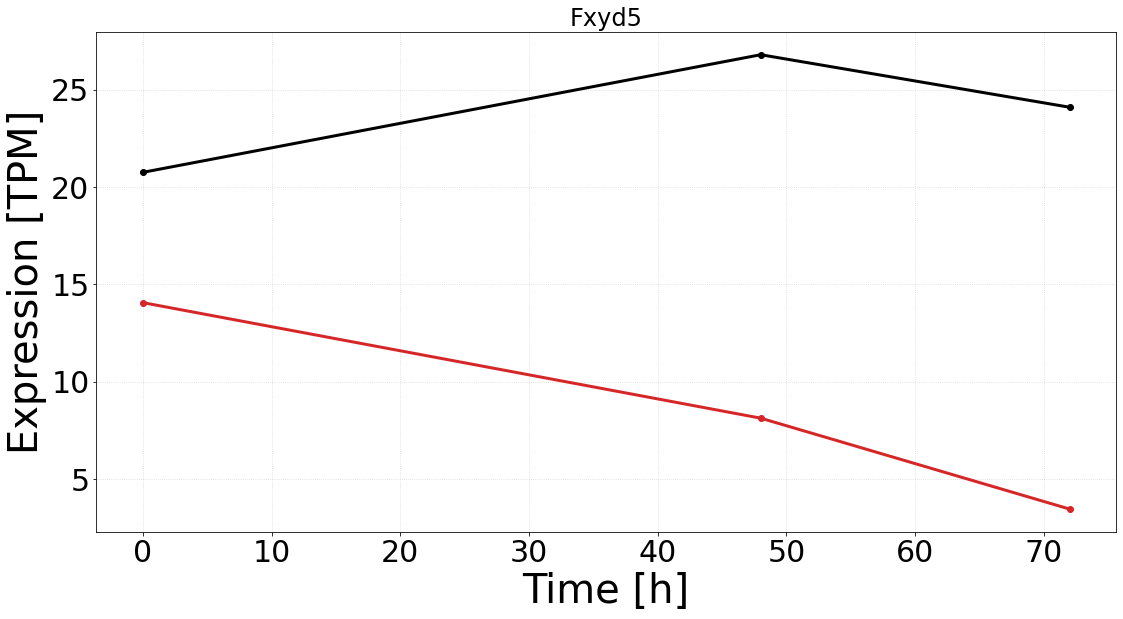

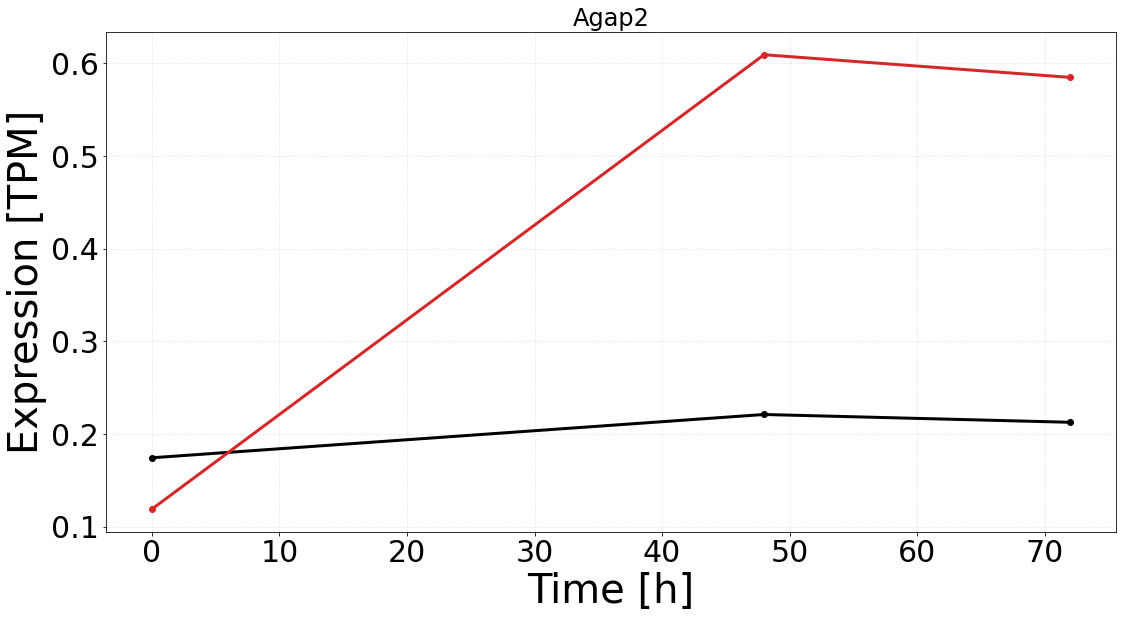

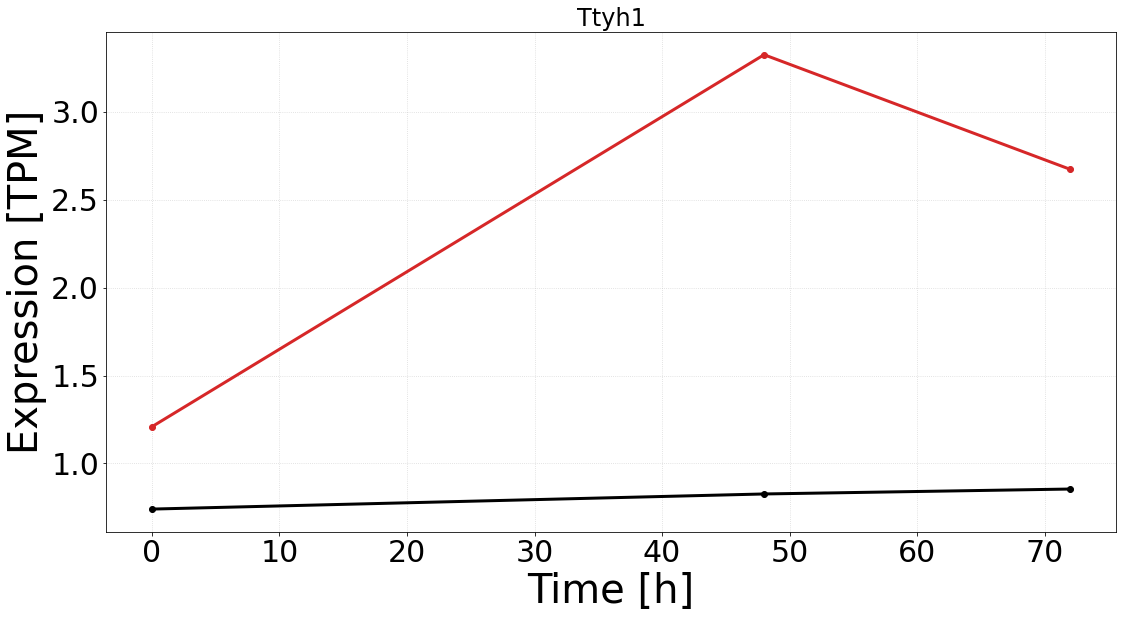

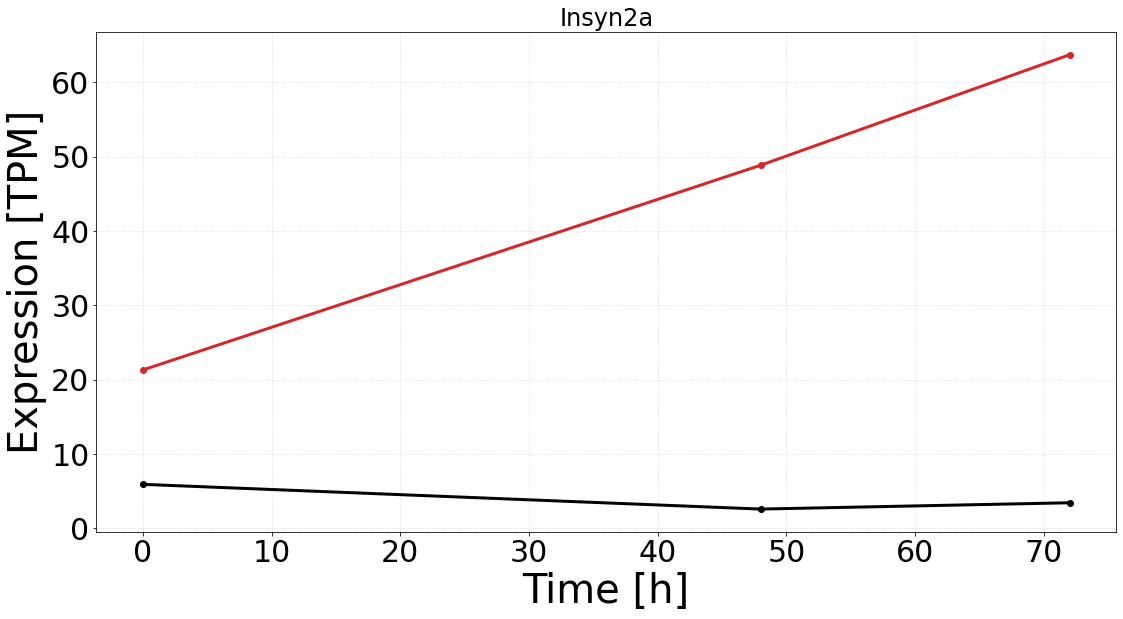

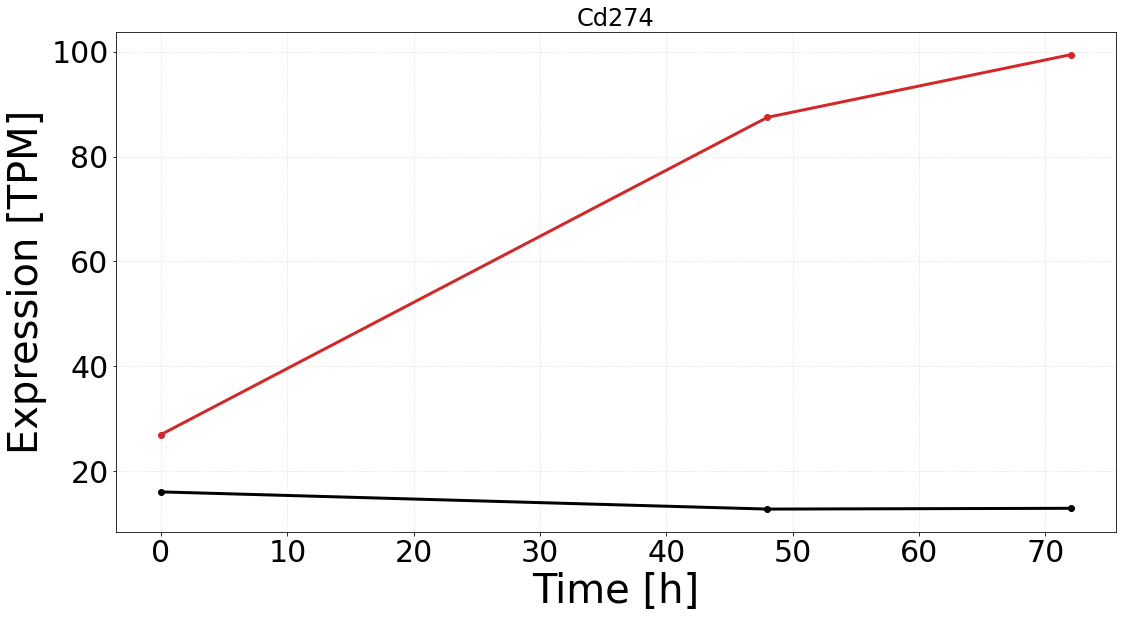

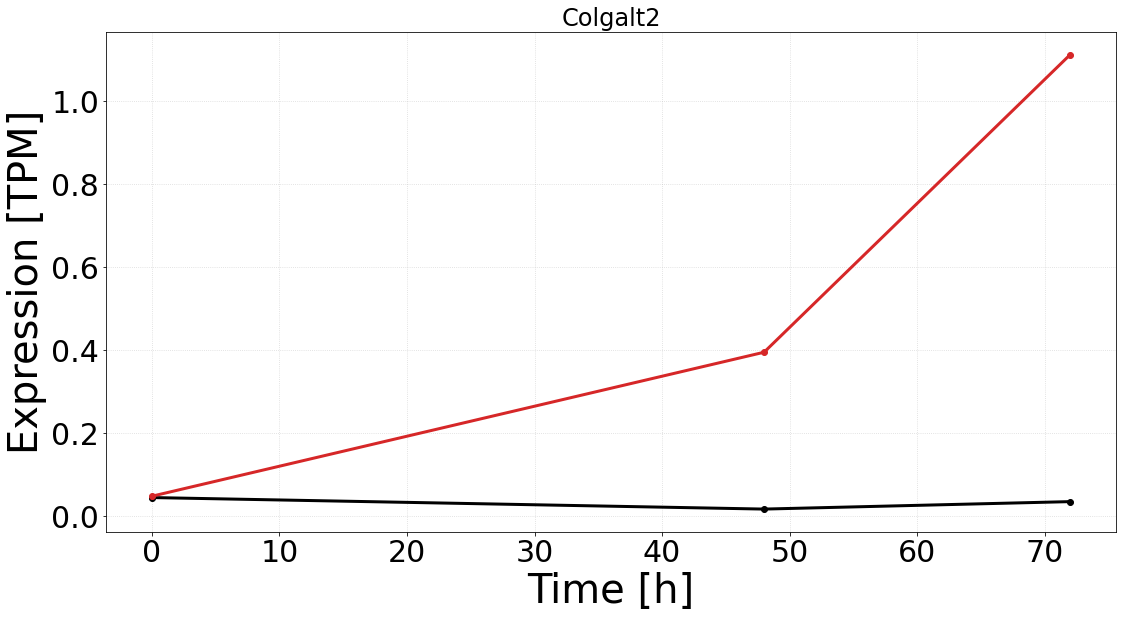

In [17]:
# do some plotting on a bigger set
wt_labels = [label for label in simple_expression.columns if 'WT' in label]
mut_labels = [label for label in simple_expression.columns if 'MUT' in label]

for ensembl in list_foura:
    gene_name = annotation.loc[ensembl]['ext_gene']
    description = annotation.loc[ensembl]['description'].split(' [')[0]
    if simple_expression.loc[ensembl, mut_labels][-1] > simple_expression.loc[ensembl, mut_labels][0]:
        trend = 'up'
        message = '\t'.join([ensembl, gene_name, trend, description])
        print(termcolor.colored(message, 'red'))
    else:
        trend = 'down'
        message = '\t'.join([ensembl, gene_name, trend, description])
        print(termcolor.colored(message, 'blue'))

for ensembl in list_foura:
    gene_name = annotation.loc[ensembl]['ext_gene']

    matplotlib.pyplot.plot([0, 48, 72], simple_expression.loc[ensembl, wt_labels], 'o-', color='black', lw=3)
    matplotlib.pyplot.plot([0, 48, 72], simple_expression.loc[ensembl, mut_labels], 'o-', color='tab:red', lw=3)
    
    matplotlib.pyplot.grid(alpha=0.5, ls=':')
    matplotlib.pyplot.title(gene_name)
    matplotlib.pyplot.xlabel('Time [h]')
    matplotlib.pyplot.ylabel('Expression [TPM]')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

# 4. remove genes that are lowly expressed

In [18]:
lowly_expressed = []
for ensembl in list_foura:
    if numpy.max(simple_expression.loc[ensembl, :]) < 2:
        lowly_expressed.append(ensembl)
print(len(lowly_expressed))

5


In [19]:
list_five = []
for element in list_foura:
    if element not in lowly_expressed:
        list_five.append(element)
print(len(list_five))

15


# 5. remove genes that do not change at least 5 TPM on MUT

In [20]:
small_changers = []
for ensembl in list_five:
    if (simple_expression.loc[ensembl, 'MUT_72h'] - simple_expression.loc[ensembl, 'MUT_0h']) < 5:
        small_changers.append(ensembl)
print(len(small_changers))

12


In [21]:
list_six = []
for element in list_five:
    if element not in small_changers:
        list_six.append(element)
print(len(list_six))

3


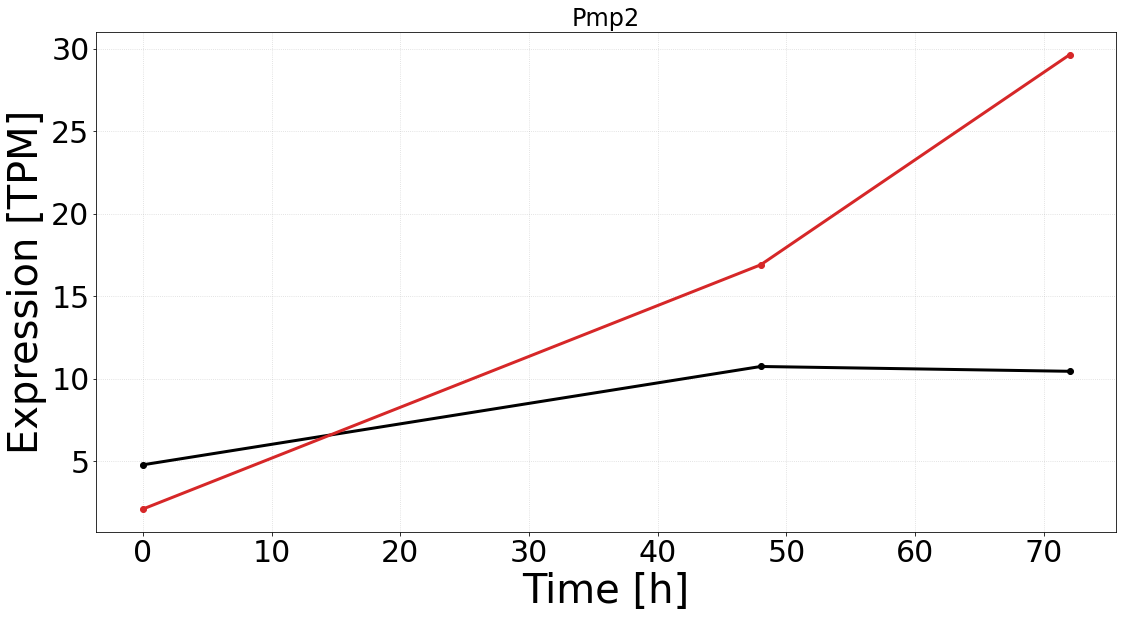

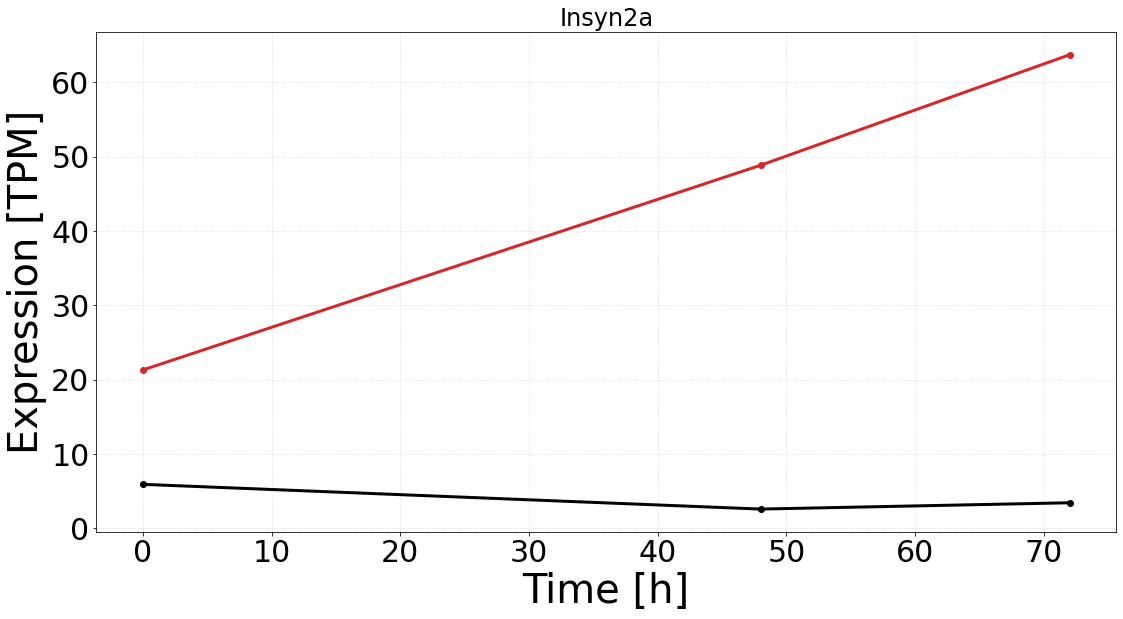

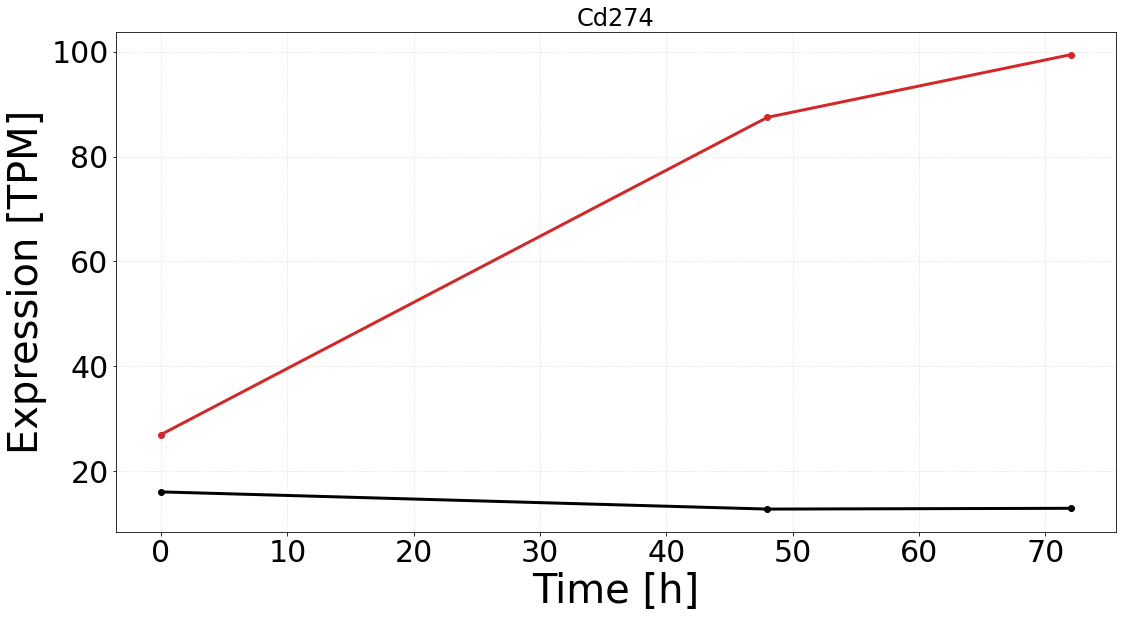

In [22]:
# final plotting of those three genes

wt_labels = [label for label in simple_expression.columns if 'WT' in label]
mut_labels = [label for label in simple_expression.columns if 'MUT' in label]

for ensembl in list_six:
    matplotlib.pyplot.plot([0, 48, 72], simple_expression.loc[ensembl, wt_labels], 'o-', color='black', lw=3)
    matplotlib.pyplot.plot([0, 48, 72], simple_expression.loc[ensembl, mut_labels], 'o-', color='tab:red', lw=3)
    
    matplotlib.pyplot.grid(alpha=0.5, ls=':')
    matplotlib.pyplot.title(annotation.loc[ensembl]['ext_gene'])
    matplotlib.pyplot.xlabel('Time [h]')
    matplotlib.pyplot.ylabel('Expression [TPM]')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()